<a href="https://colab.research.google.com/github/bermudezfc/CCMACLRL_PROJECT_COM221/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score, f1_score
from sklearn.metrics import accuracy_score



In [ ]:
#Load the dataset
df = pd.read_csv('dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [ ]:
#df id the dataset without the engineered features
# Define features and target
X_untouched = df.drop(columns=['Target'])  # Assuming 'Target' is the label
y_untouched = df['Target']

# Split the untouched data
X_train_untouched, X_test_untouched, y_train_untouched, y_test_untouched = train_test_split(
    X_untouched, y_untouched, test_size=0.2, random_state=42
)

# Dictionary to store the results
baseline_scores = {}

# Random Forest
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train_untouched, y_train_untouched)
rf_accuracy = accuracy_score(y_test_untouched, rf_baseline.predict(X_test_untouched))
baseline_scores['Random Forest'] = rf_accuracy
print(f"Random Forest Accuracy on Untouched Dataset: {rf_accuracy * 100:.2f}%")

# Logistic Regression
lr_baseline = LogisticRegression(max_iter=1000, random_state=42)
lr_baseline.fit(X_train_untouched, y_train_untouched)
lr_accuracy = accuracy_score(y_test_untouched, lr_baseline.predict(X_test_untouched))
baseline_scores['Logistic Regression'] = lr_accuracy
print(f"Logistic Regression Accuracy on Untouched Dataset: {lr_accuracy * 100:.2f}%")

# Support Vector Machine (SVM)
svm_baseline = SVC(random_state=42)
svm_baseline.fit(X_train_untouched, y_train_untouched)
svm_accuracy = accuracy_score(y_test_untouched, svm_baseline.predict(X_test_untouched))
baseline_scores['SVM'] = svm_accuracy
print(f"SVM Accuracy on Untouched Dataset: {svm_accuracy * 100:.2f}%")

# Display results for comparison
print("\nBaseline Model Accuracies on Untouched Dataset (for comparison):")
for model, score in baseline_scores.items():
    print(f"{model}: {score * 100:.2f}%")

Random Forest Accuracy on Untouched Dataset: 77.29%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy on Untouched Dataset: 75.48%
SVM Accuracy on Untouched Dataset: 72.88%

Baseline Model Accuracies on Untouched Dataset (for comparison):
Random Forest: 77.29%
Logistic Regression: 75.48%
SVM: 72.88%




##Data Cleaning

In [ ]:
# Correcting some typo in column name and replace some single quotes with underscores
df.rename(columns = {"Nacionality": "Nationality",
                           "Mother's qualification": "MotherQualification",
                           "Father's qualification": "FatherQualification",
                           "Mother's occupation": "MotherOccupation",
                           "Father's occupation": "FatherOccupation",
                           "Age at enrollment": "AgeEnrollment"}, inplace = True)

In [ ]:
#Rplace the whitespcae with "_" underscore
df.columns = df.columns.str.replace(' ', '_')

#Removing the parenthesis
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')

In [ ]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Nationality,MotherQualification,FatherQualification,MotherOccupation,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
print(df.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'MotherQualification', 'FatherQualification', 'MotherOccupation',
       'FatherOccupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'AgeEnrollment', 'International', 'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Targ

In [ ]:
# Change data types of columns that should be categorical
col = ['Marital_status', 'Application_mode', 'Application_order', 'Course',
      'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'MotherQualification', 'FatherQualification', 'MotherOccupation',
       'FatherOccupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
      'International', 'Target']

df[col] = df[col].astype('category')

In [ ]:
df.duplicated().sum() # duplicate values check

0

In [ ]:
#Change the data to (0 is "Dropout", 1 is "Enrolled", and 2 is "Graduate")
# Define a mapping dictionary for the target values
target_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

# Apply the mapping to the 'Target' adn 'Target_encoded' column
df['Target_encoded'] = df['Target'].map(target_mapping)



In [ ]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Nationality,MotherQualification,FatherQualification,MotherOccupation,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target,Target_encoded
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2


In [ ]:
# Drop 'Target' variable
df.drop('Target', axis = 1, inplace = True)

##Feature Engineering

In [ ]:
total_columns = len(df.columns)
print( total_columns)

35


In [ ]:
print(df.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'MotherQualification', 'FatherQualification', 'MotherOccupation',
       'FatherOccupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'AgeEnrollment', 'International', 'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Targ

In [ ]:
cats = ['Marital_status', 'Application_mode', 'Application_order',
        'Course','Daytime/evening_attendance', 'Previous_qualification',
        'Nationality','MotherQualification', 'FatherQualification',
        'MotherOccupation', 'FatherOccupation', 'Displaced',
        'Educational_special_needs', 'Debtor','Tuition_fees_up_to_date',
        'Gender', 'Scholarship_holder','International']


# List to store p-values
p_values = []

# Loop through each categorical feature
for col in cats:
    # Create a cross-tabulation for each categorical feature and the target
    crosstable = pd.crosstab(df[col], df['Target_encoded'])
    p = chi2_contingency(crosstable)[1]
    p_values.append(p)

chi2_result = pd.DataFrame({
    'Variable': cats,
    'P_value': [round(p, 5) for p in p_values]
}).sort_values('P_value')


chi2_result

,Variable,P_value
0,Marital_status,0.00000
15,Gender,0.00000
14,Tuition_fees_up_to_date,0.00000
13,Debtor,0.00000
11,Displaced,0.00000
10,FatherOccupation,0.00000
9,MotherOccupation,0.00000
16,Scholarship_holder,0.00000
8,FatherQualification,0.00000
5,Previous_qualification,0.00000


In [ ]:
students = df.drop(['Nationality', 'International', 'Educational_special_needs'],
                              axis = 1)

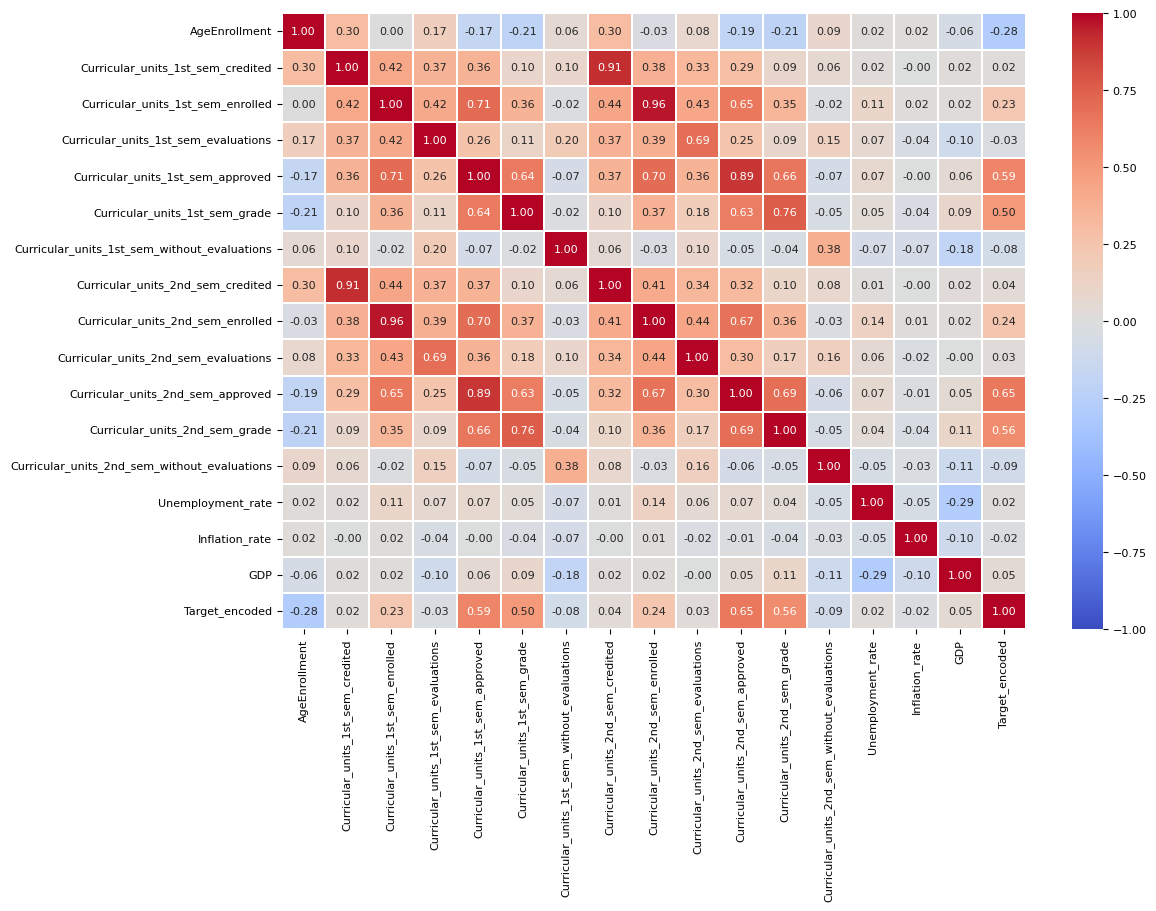

In [ ]:
# Numeric features
num_features = df[['AgeEnrollment',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved',
       'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved',
       'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations',
       'Unemployment_rate', 'Inflation_rate', 'GDP', 'Target_encoded']]

# Heatmap of correlation matrix
plt.figure(figsize = (12, 8))
plt.rcParams.update({'font.size': 8})
hm = sns.heatmap(num_features.corr(method = 'spearman'),
                 cmap = 'coolwarm', annot = True, fmt = '.2f',
                 linewidths = .2, vmin = -1, vmax = 1, center = 0)

In [ ]:
# Averaging academic performance data across two semesters
students['avg_credited'] = students[['Curricular_units_1st_sem_credited',
                                'Curricular_units_2nd_sem_credited']].mean(axis = 1)
students['avg_enrolled'] = students[['Curricular_units_1st_sem_enrolled',
                                'Curricular_units_2nd_sem_enrolled']].mean(axis = 1)
students['avg_evaluations'] = students[['Curricular_units_1st_sem_evaluations',
                                   'Curricular_units_2nd_sem_evaluations']].mean(axis = 1)
students['avg_approved'] = students[['Curricular_units_1st_sem_approved',
                                'Curricular_units_2nd_sem_approved']].mean(axis = 1)
students['avg_grade'] = students[['Curricular_units_1st_sem_grade',
                             'Curricular_units_2nd_sem_grade']].mean(axis = 1)
students['avg_without_evaluations'] = students[['Curricular_units_1st_sem_without_evaluations',
                                           'Curricular_units_2nd_sem_without_evaluations']].mean(axis = 1)

In [ ]:
# Remove the outliers
students = students.drop(students.loc[(students['avg_approved'] == 0) & (students['Target_encoded'] == 2)].index)

# Check the rows with zero average grade and students being graduade
students.loc[(students['avg_grade'] == 0) & (students['Target_encoded'] == 2)]

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,MotherQualification,FatherQualification,MotherOccupation,FatherOccupation,...,Unemployment_rate,Inflation_rate,GDP,Target_encoded,avg_credited,avg_enrolled,avg_evaluations,avg_approved,avg_grade,avg_without_evaluations


In [ ]:
# Drop unselected features along with the features that have been aggregated into new ones
students = students.drop(columns = ['Unemployment_rate', 'Inflation_rate',
                                              'avg_credited', 'avg_evaluations',
                                              'Curricular_units_1st_sem_credited',
                                              'Curricular_units_1st_sem_enrolled',
                                              'Curricular_units_1st_sem_evaluations',
                                              'Curricular_units_1st_sem_approved',
                                              'Curricular_units_1st_sem_grade',
                                              'Curricular_units_1st_sem_without_evaluations',
                                              'Curricular_units_2nd_sem_credited',
                                              'Curricular_units_2nd_sem_enrolled',
                                              'Curricular_units_2nd_sem_evaluations',
                                              'Curricular_units_2nd_sem_approved',
                                              'Curricular_units_2nd_sem_grade',
                                              'Curricular_units_2nd_sem_without_evaluations'])

##Data Modelling

In [ ]:
# Split the data into training and test set
train, test = train_test_split(students, test_size = 0.2,
                               stratify = students['Target_encoded'], random_state = 0)

# Extract features and labels
train_features = train.drop('Target_encoded', axis = 1)
train_labels = train['Target_encoded']
test_features = test.drop('Target_encoded', axis = 1)
test_labels = test['Target_encoded']

In [ ]:
# Remove rows of class-1 (enrolled) from training and test set
train_bi = train.drop(train[train['Target_encoded']==1].index)
test_bi = test.drop(test[test['Target_encoded']==1].index)

# Set the target label as 1 - 'Dropout', 0 - 'Graduate'
train_bi['Target_encoded'] = train_bi['Target_encoded'].replace([0, 2], [1, 0])
test_bi['Target_encoded'] = test_bi['Target_encoded'].replace([0, 2], [1, 0])

# Extract features and labels
train_bi_X = train_bi.drop('Target_encoded', axis = 1)
train_bi_y = train_bi['Target_encoded']
test_bi_X = test_bi.drop('Target_encoded', axis = 1)
test_bi_y = test_bi['Target_encoded']

<ipython-input-329-2c3128f42d5d>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  train_bi['Target_encoded'] = train_bi['Target_encoded'].replace([0, 2], [1, 0])
<ipython-input-329-2c3128f42d5d>:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  test_bi['Target_encoded'] = test_bi['Target_encoded'].replace([0, 2], [1, 0])


In [ ]:
train_bi_X.columns.tolist()

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime/evening_attendance',
 'Previous_qualification',
 'MotherQualification',
 'FatherQualification',
 'MotherOccupation',
 'FatherOccupation',
 'Displaced',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'AgeEnrollment',
 'GDP',
 'avg_enrolled',
 'avg_approved',
 'avg_grade',
 'avg_without_evaluations']

In [ ]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Nationality,MotherQualification,FatherQualification,MotherOccupation,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target_encoded
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [ ]:
score_list = {} # I've created this dict for saving score variables into it


In [ ]:
# Random Forest
rf_bi = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_bi.fit(train_bi_X, train_bi_y)
y_pred_rf = rf_bi.predict(test_bi_X)

# Calculate metrics
rf_bi_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred_rf), 3)
rf_bi_f1score = round(f1_score(test_bi_y, y_pred_rf), 3)
rf_bi_precision = round(precision_score(test_bi_y, y_pred_rf), 3)
rf_bi_recall = round(recall_score(test_bi_y, y_pred_rf), 3)

# Print the results
print('Random Forest Performance:')
print('Accuracy:', rf_bi_accuracy)
print('F1 Score:', rf_bi_f1score)
print('Precision:', rf_bi_precision)
print('Recall:', rf_bi_recall)

Random Forest Performance:
Accuracy: 0.914
F1 Score: 0.903
Precision: 0.96
Recall: 0.852


In [ ]:
scores = cross_val_score(rf_bi, train_bi_X, train_bi_y, cv=5)
scores

array([0.91564148, 0.92091388, 0.92442882, 0.9086116 , 0.91373239])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
score_list["Random Forest Classifier"] = scores.mean()

0.92 accuracy with a standard deviation of 0.01


In [ ]:
# Logistic Regression
lr_bi = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_bi.fit(train_bi_X, train_bi_y)
y_pred_lr = lr_bi.predict(test_bi_X)

# Calculate metrics for Logistic Regression
lr_bi_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred_lr), 3)
lr_bi_f1score = round(f1_score(test_bi_y, y_pred_lr), 3)
lr_bi_precision = round(precision_score(test_bi_y, y_pred_lr), 3)
lr_bi_recall = round(recall_score(test_bi_y, y_pred_lr), 3)

# Print the results for Logistic Regression
print('Logistic Regression Performance:')
print('Accuracy:', lr_bi_accuracy)
print('F1 Score:', lr_bi_f1score)
print('Precision:', lr_bi_precision)
print('Recall:', lr_bi_recall)

Logistic Regression Performance:
Accuracy: 0.913
F1 Score: 0.898
Precision: 0.916
Recall: 0.88


In [ ]:
scores = cross_val_score(lr_bi, train_bi_X, train_bi_y, cv=5)
scores

array([0.92091388, 0.92267135, 0.92970123, 0.92618629, 0.91021127])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
score_list["Logistic Regression"] = scores.mean()

0.92 accuracy with a standard deviation of 0.01


In [ ]:
# Support Vector Machine (SVM)
svm_bi = SVC(class_weight='balanced', random_state=42)
svm_bi.fit(train_bi_X, train_bi_y)
y_pred_svm = svm_bi.predict(test_bi_X)

# Calculate metrics for SVM
svm_bi_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred_svm), 3)
svm_bi_f1score = round(f1_score(test_bi_y, y_pred_svm), 3)
svm_bi_precision = round(precision_score(test_bi_y, y_pred_svm), 3)
svm_bi_recall = round(recall_score(test_bi_y, y_pred_svm), 3)

# Print the results for SVM
print('SVM Performance:')
print('Accuracy:', svm_bi_accuracy)
print('F1 Score:', svm_bi_f1score)
print('Precision:', svm_bi_precision)
print('Recall:', svm_bi_recall)


SVM Performance:
Accuracy: 0.891
F1 Score: 0.874
Precision: 0.936
Recall: 0.82


In [ ]:
scores = cross_val_score(svm_bi, train_bi_X, train_bi_y, cv=5)
scores

array([0.89279438, 0.89630931, 0.89982425, 0.8857645 , 0.88556338])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
score_list["SVM"] = scores.mean()

0.89 accuracy with a standard deviation of 0.01


In [ ]:
score_list = list(score_list.items())

In [ ]:
for alg,score in score_list:
    print(f"{alg} Score is {str(score)[:4]} ")

Random Forest Classifier Score is 0.91 
Logistic Regression Score is 0.92 
SVM Score is 0.89 
